In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np
import pysplit
from __future__ import division
import os
import shutil
from subprocess import call
import itertools
import fnmatch
from calendar import monthrange
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pysplit
import geopandas as gpd
import pandas as pd

In [2]:
clusgroup = pysplit.make_trajectorygroup(r'/Users/gong/trajectories/umn/*umn*0500*')
print("number of 500-m trajectories:",clusgroup.trajcount)

number of 500-m trajectories: 92


In [3]:
clusgroup.trajectories[1].data

,Timestep,Pressure,Rainfall,Relative_Humidity,Specific_Humidity,Mixing_Ratio,Terrain_Altitude,Solar_Radiation,geometry,DateTime,Temperature_C,Temperature,Mixing_Depth
Timestep,,,,,,,,,,,,,
0.0,0.0,925.8,1.2,61.9,13.7,14.0,201.3,981.2,POINT Z (119.23000 31.00000 500.00000),2011-06-08 06:00:00,None,None,None
-1.0,-1.0,924.6,1.2,63.4,13.5,13.8,214.3,1065.3,POINT Z (119.19400 30.85800 501.70000),2011-06-08 05:00:00,None,None,None
-2.0,-2.0,923.0,1.2,64.7,13.3,13.6,227.3,1093.3,POINT Z (119.13600 30.72600 506.20000),2011-06-08 04:00:00,None,None,None
-3.0,-3.0,921.1,1.2,65.7,13.1,13.4,240.4,1061.2,POINT Z (119.05400 30.60400 513.30000),2011-06-08 03:00:00,None,None,None
-4.0,-4.0,918.8,1.2,66.4,12.9,13.2,253.8,970.6,POINT Z (118.94800 30.49100 523.00000),2011-06-08 02:00:00,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-164.0,-164.0,994.3,0.0,80.5,18.8,19.3,-2.3,193.4,POINT Z (113.78400 13.40300 116.80000),2011-06-01 10:00:00,None,None,None
-165.0,-165.0,992.6,0.0,80.5,18.7,19.2,-1.8,446.4,POINT Z (113.77100 13.32700 130.90000),2011-06-01 09:00:00,None,None,None
-166.0,-166.0,991.2,0.0,80.5,18.6,19.2,-1.5,675.6,POINT Z (113.74900 13.24700 144.20000),2011-06-01 08:00:00,None,None,None


In [12]:
working_dir = r'/Users/gong/hysplit/working'
storage_dir = r'/Users/gong/trajectories/umn'
meteo_dir = r'/Users/gong/mete'

for traj in clusgroup:
    traj.calculate_distance()
    traj.calculate_vector()


In [22]:
traj.data.Specific_Humidity	

Timestep
 0.0      12.2
-1.0      12.2
-2.0      12.2
-3.0      12.2
-4.0      12.2
          ... 
-164.0    18.5
-165.0    18.4
-166.0    18.4
-167.0    18.3
-168.0    18.2
Name: Specific_Humidity, Length: 169, dtype: float64

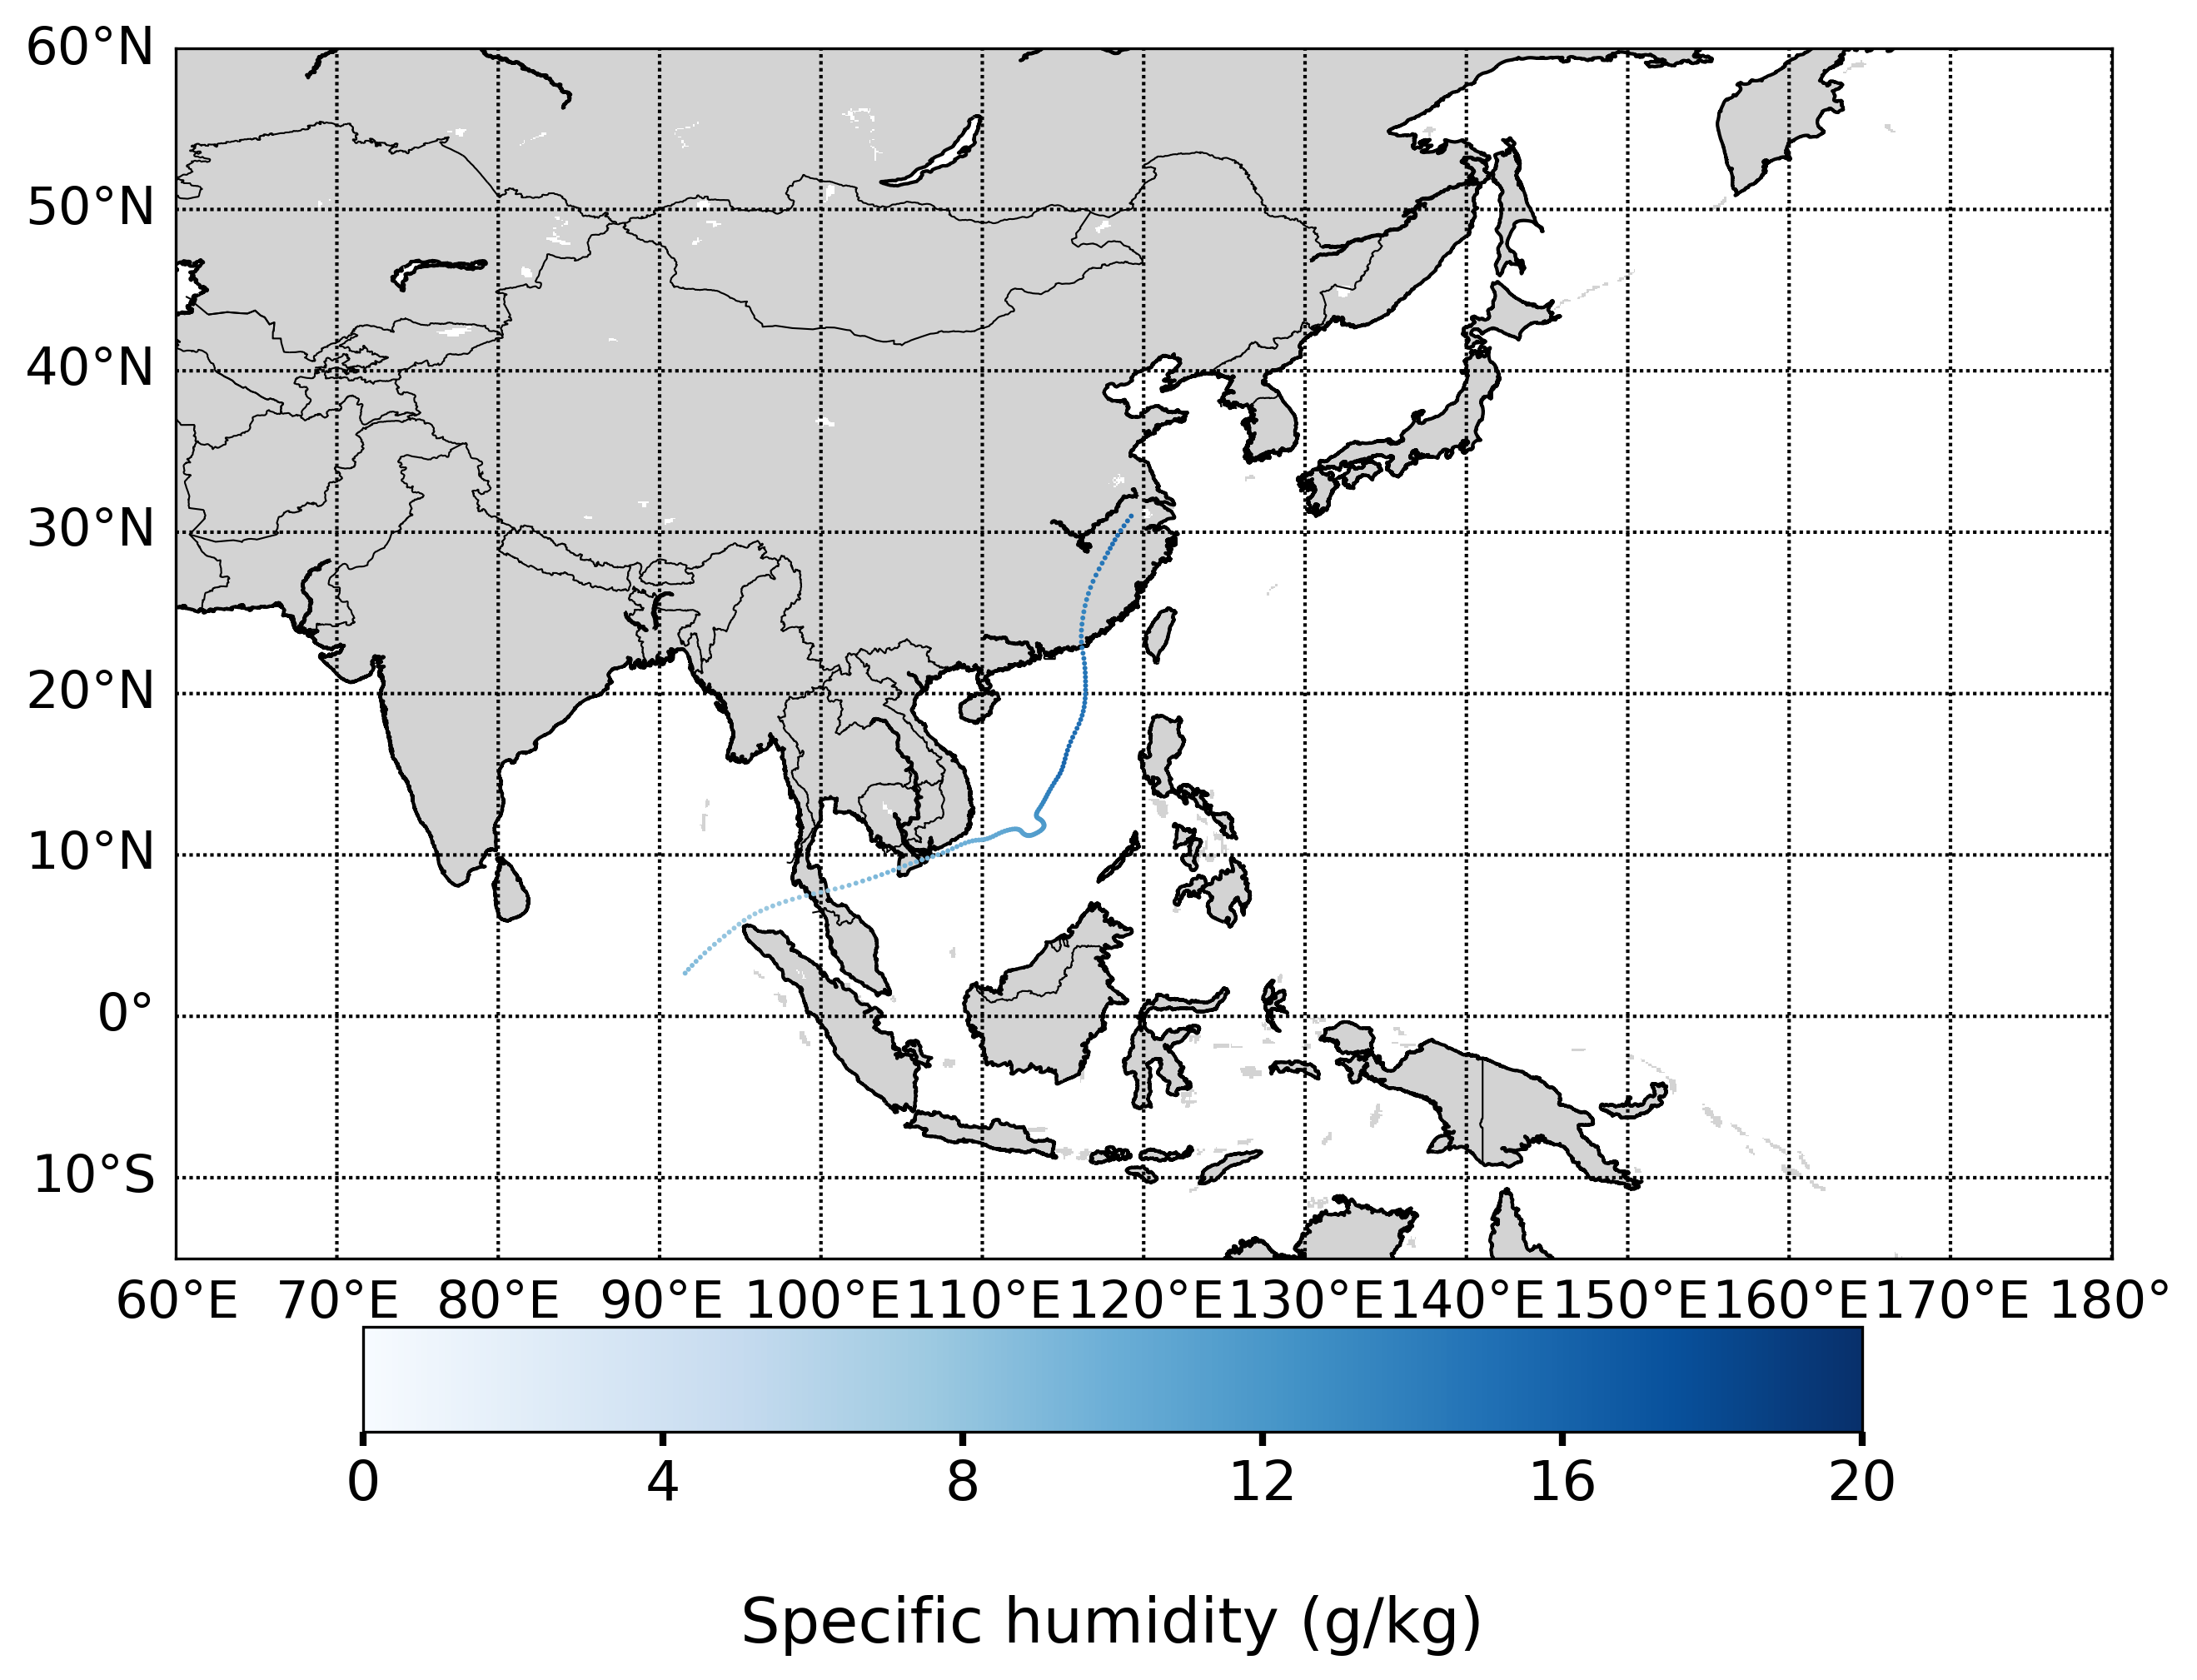

In [42]:
mapcorners = [60, -15, 180, 60]
standard_pm = None
fig, ax = plt.subplots(figsize=(10,7),dpi=300)

bmap_params = pysplit.MapDesign(mapcorners, standard_pm, mapcolor = None, latlon_spacing = (10,10),
                                latlon_labelspacing=(10,10),
                                lon_labels=["bottom"], latlon_fs=15,
                                drawoutlines=True,resolution="h",
                                )

bmap = bmap_params.make_basemap(ax=ax)
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white")
# for traj in clusgroup:
#     traj.calculate_distance()
#     traj.calculate_vector()
#     mappable = pysplit.traj_scatter(
#         traj.data.Specific_Humidity	.astype(np.float64).values,
#         traj.data.geometry.apply(lambda p: p.x).values,
#         traj.data.geometry.apply(lambda p: p.y).values,
#         bmap, colormap=plt.cm.Blues,size=2,
#         vmin=0, vmax=20, suppress_printmsg=True)

mappable = pysplit.traj_scatter(
        traj.data.Specific_Humidity	.astype(np.float64).values,
        traj.data.geometry.apply(lambda p: p.x).values,
        traj.data.geometry.apply(lambda p: p.y).values,
        bmap, colormap=plt.cm.Blues,size=2,
        vmin=0, vmax=20, suppress_printmsg=True)
cax_position = [0.2, 0.05, 0.6, 0.06]
cax, cbar = pysplit.make_cax_cbar(fig, cax_position, mappable, cbar_label='Specific humidity (g/kg)');

In [16]:
traj

In [18]:
traj.data['geometry'].values[:]

<GeometryArray>
[       <POINT Z (119.23 31 500)>, <POINT Z (118.998 30.699 501.6)>,
  <POINT Z (118.78 30.396 512.1)>, <POINT Z (118.575 30.096 532.5)>,
 <POINT Z (118.387 29.805 563.5)>, <POINT Z (118.219 29.528 604.4)>,
 <POINT Z (118.071 29.266 654.7)>, <POINT Z (117.926 29.002 707.8)>,
 <POINT Z (117.771 28.718 757.2)>, <POINT Z (117.604 28.412 802.8)>,
 ...
    <POINT Z (94.01 4.97 2018.4)>,  <POINT Z (93.706 4.717 2010.6)>,
   <POINT Z (93.401 4.46 2005.1)>,    <POINT Z (93.097 4.195 2002)>,
    <POINT Z (92.802 3.927 2003)>,    <POINT Z (92.522 3.662 2008)>,
   <POINT Z (92.26 3.404 2013.9)>,  <POINT Z (92.016 3.155 2019.6)>,
   <POINT Z (91.79 2.913 2023.5)>,  <POINT Z (91.583 2.675 2024.2)>]
Length: 169, dtype: geometry

In [17]:

working_dir = r'/Users/gong/hysplit/working'
storage_dir = r'/Users/gong/trajectories/umn'
meteo_dir = r'/Users/gong/mete'



pysplit.generate_bulktraj('umn', 
                          working_dir,
                          storage_dir, 
                          meteo_dir,
                          years = [2011,],
                          months = [6], 
                          hours = [0,6,12,18],
                          altitudes = [500], 
                          coordinates = (31, 119.23), 
                          run = -168,
                          get_clipped=False, 
                          get_reverse=False,
                          meteoyr_2digits=False,
                          outputyr_2digits=False,
                          hysplit = r'/Users/gong/hysplit/exec/hyts_std')

 HYSPLIT - Initialization
 HYSPLIT version: hysplit.v5.2.1
 Last Changed Date: 2022-05-16
  NOTICE: using namelist file SETUP.CFG
 Calculation Started ... please be patient
 *ERROR* metpos: start point not within (x,y,t) any data file
  - start time after end of meteorology data
 HYSPLIT - Initialization
 HYSPLIT version: hysplit.v5.2.1
 Last Changed Date: 2022-05-16
  NOTICE: using namelist file SETUP.CFG
 Calculation Started ... please be patient
 Percent complete:   0.6
 Percent complete:   1.2
 Percent complete:   1.8
 Percent complete:   2.4
 Percent complete:   3.0
 Percent complete:   3.6
 Percent complete:   4.2
 Percent complete:   4.8
 Percent complete:   5.4
 Percent complete:   6.0
 Percent complete:   6.5
 Percent complete:   7.1
 Percent complete:   7.7
 Percent complete:   8.3
 Percent complete:   8.9
 Percent complete:   9.5
 Percent complete:  10.1
 Percent complete:  10.7
 Percent complete:  11.3
 Percent complete:  11.9
 Percent complete:  12.5
 Percent complete:  13

900


 Calculation Started ... please be patient
 Percent complete:   0.6
 Percent complete:   1.2
 Percent complete:   1.8
 Percent complete:   2.4
 Percent complete:   3.0
 Percent complete:   3.6
 Percent complete:   4.2
 Percent complete:   4.8
 Percent complete:   5.4
 Percent complete:   6.0
 Percent complete:   6.5
 Percent complete:   7.1
 Percent complete:   7.7
 Percent complete:   8.3
 Percent complete:   8.9
 Percent complete:   9.5
 Percent complete:  10.1
 Percent complete:  10.7
 Percent complete:  11.3
 Percent complete:  11.9
 Percent complete:  12.5
 Percent complete:  13.1
 Percent complete:  13.7
 Percent complete:  14.3
 Percent complete:  14.9
 Percent complete:  15.5
 Percent complete:  16.1
 Percent complete:  16.7
 Percent complete:  17.3
 Percent complete:  17.9
 Percent complete:  18.5
 Percent complete:  19.0
 Percent complete:  19.6
 Percent complete:  20.2
 Percent complete:  20.8
 Percent complete:  21.4
 Percent complete:  22.0
 Percent complete:  22.6
 Percen